#Transfer_Learnng Based Classification of Viral Pneumonia, Normal, and Covid Conditions from Medical Images

In [ ]:
#setting up by kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


##Loading Dataset

In [ ]:
#import dataset form kaggle api
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Extracting Zip File
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Import Libraries

In [ ]:
#importing necessary libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##List directories

In [ ]:
import os
base_dir = '/content/Covid19-dataset'
print("Content of base direcotory:")
print(os.listdir(base_dir))
print("Content of train direcotory:")
print(os.listdir(f'{base_dir}/train'))
print("Content of test direcotory:")
print(os.listdir(f'{base_dir}/test'))

Content of base direcotory:
['test', 'train']
Content of train direcotory:
['Normal', 'Covid', 'Viral Pneumonia']
Content of test direcotory:
['Normal', 'Covid', 'Viral Pneumonia']


In [ ]:
#Creating variable for directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
# Directory with training pictures
train_Viral_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
train_Normal_dir = os.path.join(train_dir, 'Normal')
train_Covid_dir = os.path.join(train_dir, 'Covid')

# Directory with testing pictures
test_Viral_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
test_normal_dir = os.path.join(train_dir, 'Normal')
test_Covid_dir = os.path.join(train_dir, 'Covid')

In [ ]:
train_Viral_Pneumonia_fnames = os.listdir( train_Viral_Pneumonia_dir )
train_Normal_fnames = os.listdir( train_Normal_dir)
train_Covid_fnames = os.listdir( train_Covid_dir)
print(train_Viral_Pneumonia_fnames[:10])
print(train_Normal_fnames[:10])
print(train_Covid_fnames[:10])

['025.jpeg', '071.jpeg', '096.jpeg', '063.jpeg', '095.jpeg', '018.jpeg', '021.jpeg', '045.jpeg', '083.jpeg', '042.jpeg']
['025.jpeg', '071.jpeg', '096.jpeg', '063.jpeg', '095.jpeg', '018.jpeg', '021.jpeg', '083.jpeg', '09.jpeg', '016.jpeg']
['COVID-00028.jpg', 'COVID-00029.jpg', '025.jpeg', 'COVID-00004.jpg', '061.jpg', 'COVID-00020.jpg', 'COVID-00026.jpg', '021.jpeg', '045.jpeg', '083.jpeg']


In [ ]:
print('total Normal Pneumonia images', len(os.listdir(train_Normal_dir)))
print('total Viral Pneumonia images', len(os.listdir(train_Viral_Pneumonia_dir)))
print('total Covid images', len(os.listdir(train_Covid_dir)))

total Normal Pneumonia images 70
total Viral Pneumonia images 70
total Covid images 111


##Visualizing Images

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
nrows = 4
ncols = 4
pic_index = 0

###Viral Pneumonia

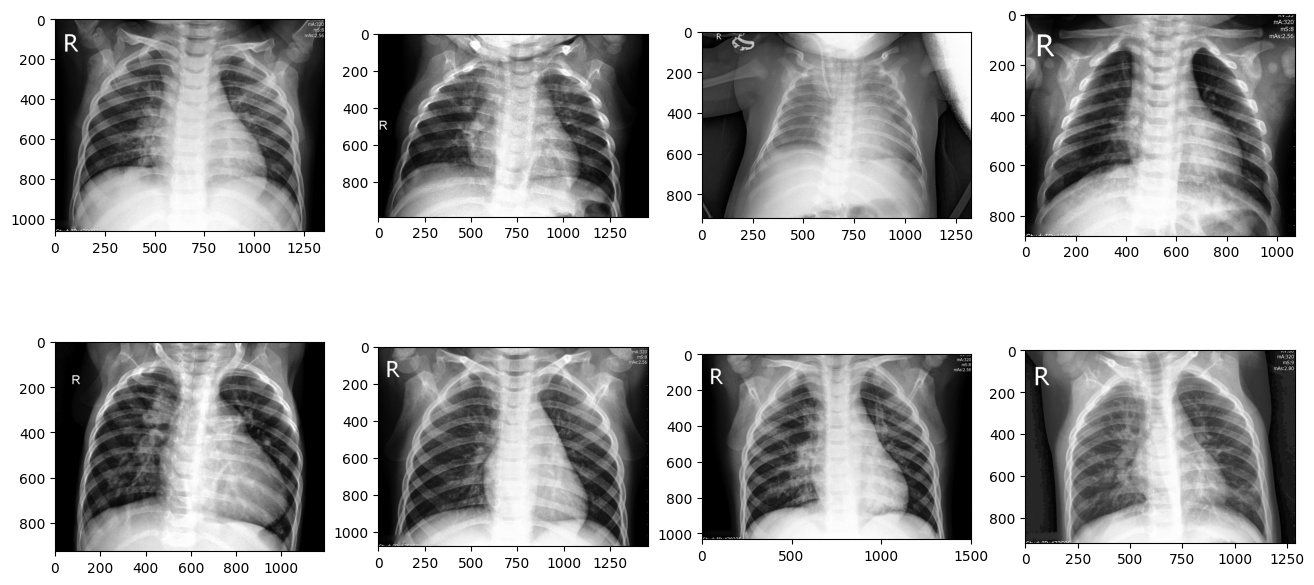

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_Viral_Pneumonia = [os.path.join(train_Viral_Pneumonia_dir, fname)
                for fname in train_Viral_Pneumonia_fnames[ pic_index-8:pic_index]
               ]
next_Normal = [os.path.join(train_Normal_dir, fname)
                for fname in train_Normal_fnames[ pic_index-8:pic_index]
               ]
next_Covid = [os.path.join(train_Covid_dir, fname)
                for fname in train_Covid_fnames[ pic_index-8:pic_index]
               ]
for i, img_path in enumerate(next_Viral_Pneumonia):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Normal Images

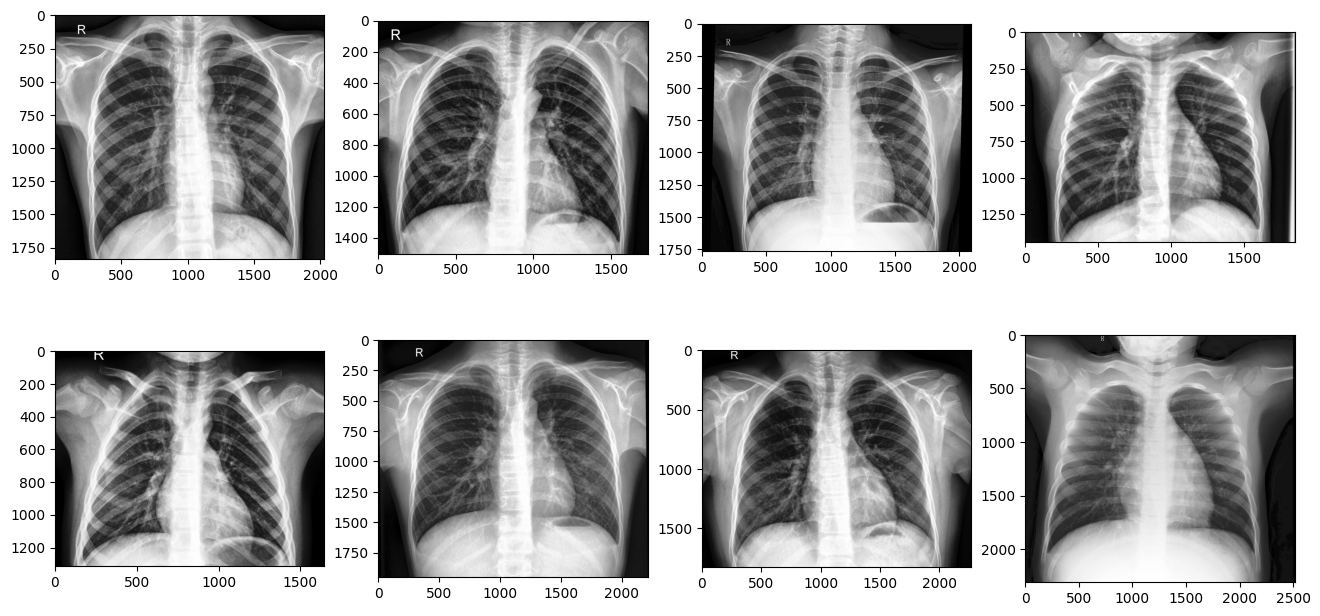

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
for j, img_path in enumerate(next_Normal):
    sp = plt.subplot(nrows, ncols, j + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Covid Images

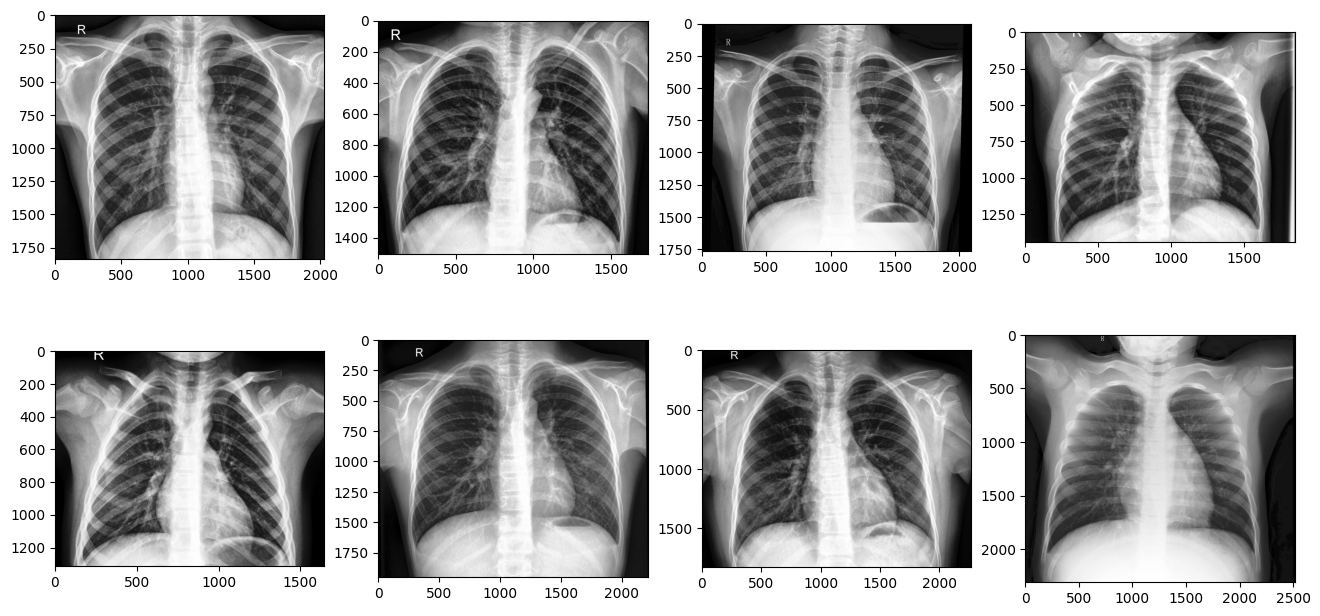

In [ ]:
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
for k, img_path in enumerate(next_Normal):
    sp = plt.subplot(nrows, ncols, k + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

###Creating VGG16 Architecutre

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

##Data Generator for auto labeling

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                    )

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##Testing

In [ ]:
history = model.fit(
            train_generator,
            epochs = 20,
            validation_data = validation_generator
            )

Epoch 1/20
13/13 [==============================] - 15s 780ms/step - loss: 5.4252 - accuracy: 0.4582 - val_loss: 1.0946 - val_accuracy: 0.3939
Epoch 2/20
13/13 [==============================] - 6s 499ms/step - loss: 1.0894 - accuracy: 0.4422 - val_loss: 1.0928 - val_accuracy: 0.3939
Epoch 3/20
13/13 [==============================] - 8s 583ms/step - loss: 1.0856 - accuracy: 0.4422 - val_loss: 1.0915 - val_accuracy: 0.3939
Epoch 4/20
13/13 [==============================] - 7s 488ms/step - loss: 1.0820 - accuracy: 0.4422 - val_loss: 1.0908 - val_accuracy: 0.3939
Epoch 5/20
13/13 [==============================] - 7s 555ms/step - loss: 1.0796 - accuracy: 0.4422 - val_loss: 1.0906 - val_accuracy: 0.3939
Epoch 6/20
13/13 [==============================] - 7s 526ms/step - loss: 1.0778 - accuracy: 0.4422 - val_loss: 1.0908 - val_accuracy: 0.3939
Epoch 7/20
13/13 [==============================] - 7s 510ms/step - loss: 1.0761 - accuracy: 0.4422 - val_loss: 1.0912 - val_accuracy: 0.3939
Epoch

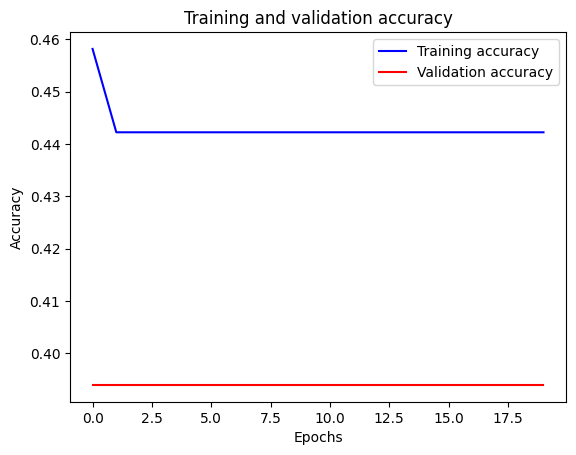

In [ ]:
#graph for compare train and validation accuracy

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Add labels and title
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


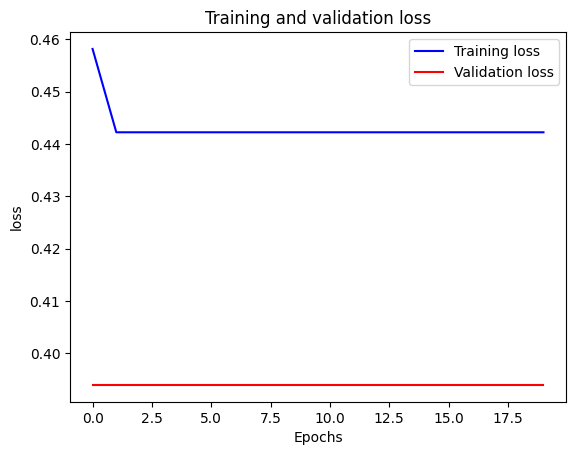

In [ ]:
# prompt: draw a graph for compare train and validation accuracy

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')

# Add labels and title
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

# Show the plot
plt.show()


###Inception Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (3, activation='softmax')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalization_94

In [ ]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train the model.
history2 = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 20
            )

Epoch 1/20
13/13 [==============================] - 6s 503ms/step - loss: 0.5552 - accuracy: 0.7371 - val_loss: 0.3645 - val_accuracy: 0.8182
Epoch 2/20
13/13 [==============================] - 7s 556ms/step - loss: 0.5004 - accuracy: 0.8008 - val_loss: 0.9672 - val_accuracy: 0.6970
Epoch 3/20
13/13 [==============================] - 6s 468ms/step - loss: 0.4224 - accuracy: 0.8287 - val_loss: 0.5235 - val_accuracy: 0.7576
Epoch 4/20
13/13 [==============================] - 6s 481ms/step - loss: 0.2956 - accuracy: 0.9004 - val_loss: 0.9735 - val_accuracy: 0.6970
Epoch 5/20
13/13 [==============================] - 7s 566ms/step - loss: 0.2900 - accuracy: 0.8964 - val_loss: 0.5107 - val_accuracy: 0.7727
Epoch 6/20
13/13 [==============================] - 6s 480ms/step - loss: 0.3499 - accuracy: 0.8845 - val_loss: 0.4117 - val_accuracy: 0.8485
Epoch 7/20
13/13 [==============================] - 7s 566ms/step - loss: 0.2943 - accuracy: 0.8924 - val_loss: 0.4064 - val_accuracy: 0.8636
Epoch 

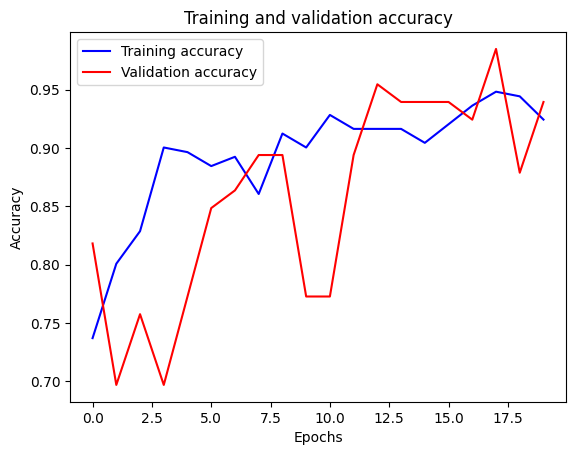

In [ ]:
#graph for compare train and validation accuracy

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

# Add labels and title
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


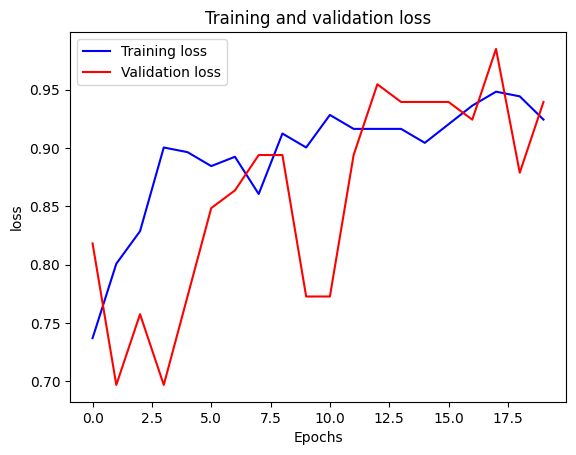

In [ ]:


import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Get the number of epochs
epochs = range(len(train_accuracy))

# Plot the training and validation accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')

# Add labels and title
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

# Show the plot
plt.show()
